<ol type=1>
<li><b>Name:- Ankush Dey,</b>   Roll No:- MDS202108 </li> 
<li><b>Name:- Anjali Pugalia,</b> Roll No:- MDS202107</li> 
<li><b>Name:- Ritirupa Dey,</b>    Roll No:- MDS202136 </li>
</ol>  

###Work Contribution
Name               | Work Contributions
-------------------|------------------
Ankush Dey         | 33.34% 
Anjali Pugalia     | 33.33%
Ritirupa Dey       | 33.33% 

##Image file links
####Checkerboard:- https://drive.google.com/file/d/1RrM0EVN_VvLroOxFy9z9Oq2FFwBXLYjF/view?usp=share_link

####Dotgridpattern:- https://drive.google.com/file/d/14eZCo8d9Viq0HkBXFoL1IfjJ-ORcKBus/view?usp=share_link

In [1]:
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)

In [2]:
!rm *.jpeg
!gdown --id 1RrM0EVN_VvLroOxFy9z9Oq2FFwBXLYjF
!unzip CheckerBoard.zip

rm: cannot remove '*.jpeg': No such file or directory
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RrM0EVN_VvLroOxFy9z9Oq2FFwBXLYjF
To: /content/CheckerBoard.zip
100% 561k/561k [00:00<00:00, 16.6MB/s]
Archive:  CheckerBoard.zip
  inflating: 1.jpeg                  
  inflating: 2.jpeg                  
  inflating: 3.jpeg                  
  inflating: 4.jpeg                  
  inflating: 5.jpeg                  
  inflating: 6.jpeg                  
  inflating: 7.jpeg                  
  inflating: 8.jpeg                  
  inflating: 9.jpeg                  
  inflating: 10.jpeg                 


###1. Create the set of correspondence points for each of your images. For the 3D scene coordinates, measure in centimeters and use (0, 0, 0) as coordinates for the top left corner. In the image, measure in pixels using (0, 0) as the top left corner. Add these correspondence points to the solution document.

In [3]:
# Preparing object points
objpoint = np.zeros((7*7,3), np.float32)
objpoint[:,:2] = np.mgrid[0:175:25,0:168:24].T.reshape(-1,2)
print('Object Points: ', objpoint, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 25.   0.   0.]
 [ 50.   0.   0.]
 [ 75.   0.   0.]
 [100.   0.   0.]
 [125.   0.   0.]
 [150.   0.   0.]
 [  0.  24.   0.]
 [ 25.  24.   0.]
 [ 50.  24.   0.]
 [ 75.  24.   0.]
 [100.  24.   0.]
 [125.  24.   0.]
 [150.  24.   0.]
 [  0.  48.   0.]
 [ 25.  48.   0.]
 [ 50.  48.   0.]
 [ 75.  48.   0.]
 [100.  48.   0.]
 [125.  48.   0.]
 [150.  48.   0.]
 [  0.  72.   0.]
 [ 25.  72.   0.]
 [ 50.  72.   0.]
 [ 75.  72.   0.]
 [100.  72.   0.]
 [125.  72.   0.]
 [150.  72.   0.]
 [  0.  96.   0.]
 [ 25.  96.   0.]
 [ 50.  96.   0.]
 [ 75.  96.   0.]
 [100.  96.   0.]
 [125.  96.   0.]
 [150.  96.   0.]
 [  0. 120.   0.]
 [ 25. 120.   0.]
 [ 50. 120.   0.]
 [ 75. 120.   0.]
 [100. 120.   0.]
 [125. 120.   0.]
 [150. 120.   0.]
 [  0. 144.   0.]
 [ 25. 144.   0.]
 [ 50. 144.   0.]
 [ 75. 144.   0.]
 [100. 144.   0.]
 [125. 144.   0.]
 [150. 144.   0.]]


###2. Manually selecting the corner pixels in the image is tedious and we want to automate it. Use cv findChessBoardCorner and cv.cornerSubPix to find and refine these positions automatically

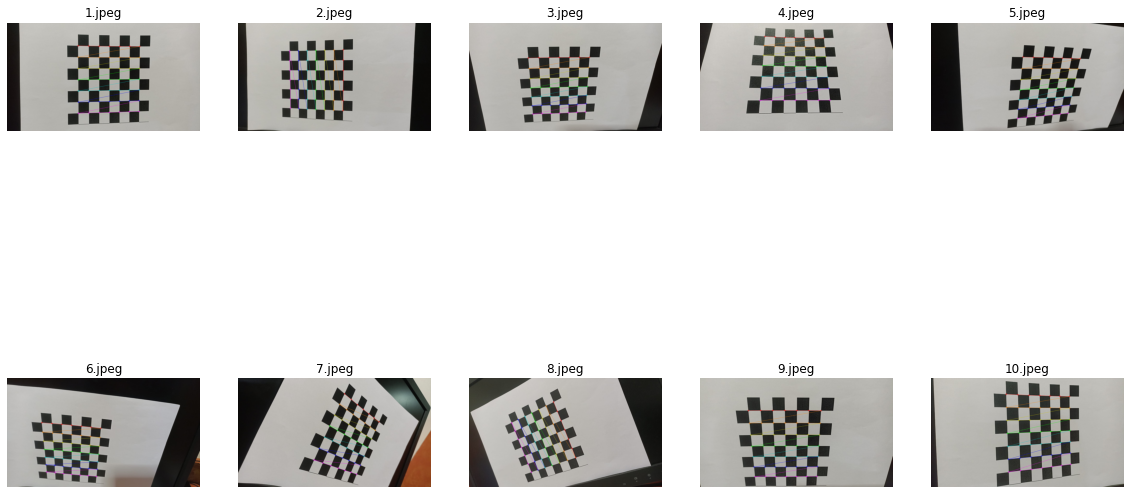

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpeg')

# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, ax = plt.subplots(2,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objpoint)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(fname)

###3. Use the function cv.calibrateCamera to calibrate your camera using your correspondences. Add the intrinsic camera matrix and the lens distortion parameters to your solution document. Format floats using printf(”%.4f”)

In [5]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",mtx, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",dist, sep='\n')

Intrinsic Camera Matrix:
[[1108.7902    0.      714.4344]
 [   0.     1217.697   434.0172]
 [   0.        0.        1.    ]]

Lens Distortion Parameters:
[[-0.0321  0.2881  0.0106 -0.0139  0.1867]]


###4. Calculate the reprojection error.

In [6]:
# Re-Projection Error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.30436111451532954


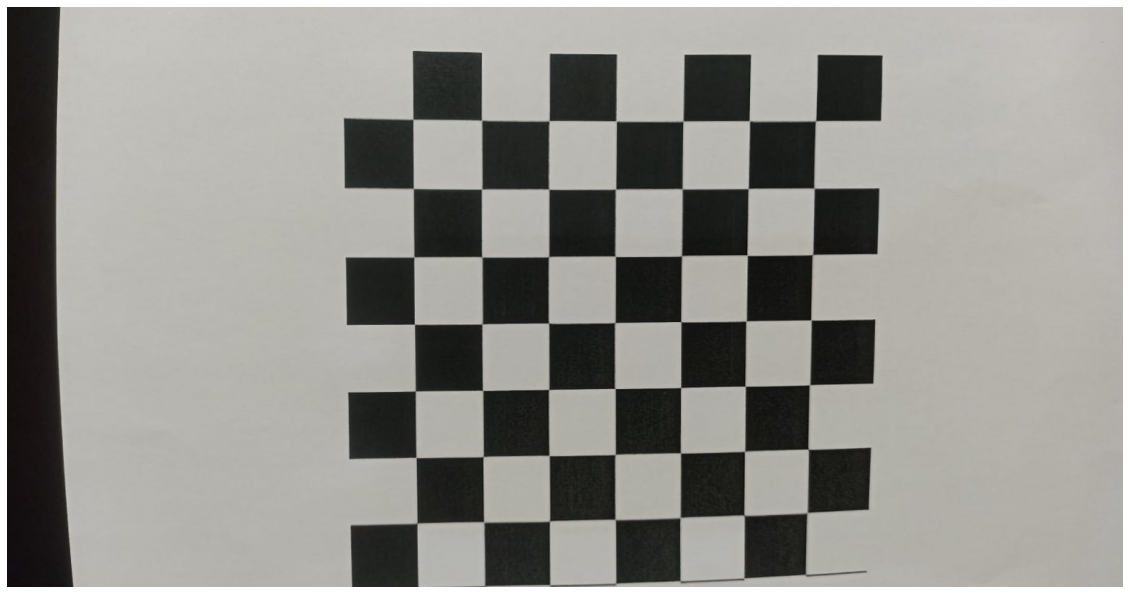

In [7]:
# Undistorted Image
img = cv2.imread(images[0])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

###5. Repeat the calibration process using the dot grid pattern. For this pattern, you will have to calculate and use the centroids of the dots as the ‘object points’ and ‘image points’.

In [2]:
!rm *.jpeg
!gdown --id 14eZCo8d9Viq0HkBXFoL1IfjJ-ORcKBus
!unzip Dotgridpattern.zip

rm: cannot remove '*.jpeg': No such file or directory
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14eZCo8d9Viq0HkBXFoL1IfjJ-ORcKBus
To: /content/Dotgridpattern.zip
100% 529k/529k [00:00<00:00, 58.3MB/s]
Archive:  Dotgridpattern.zip
  inflating: 1.jpeg                  
  inflating: 10.jpeg                 
  inflating: 2.jpeg                  
  inflating: 3.jpeg                  
  inflating: 4.jpeg                  
  inflating: 5.jpeg                  
  inflating: 6.jpeg                  
  inflating: 7.jpeg                  
  inflating: 8.jpeg                  
  inflating: 9.jpeg                  


In [3]:

# Setting up Blob Detector for the circles

# Setup SimpleBlobDetector parameters. 
blobParams = cv2.SimpleBlobDetector_Params() 

# Change thresholds 
blobParams.minThreshold = 8 
blobParams.maxThreshold = 255 

# Filter by Area. 
blobParams.filterByArea = True 
blobParams.minArea = 30
blobParams.maxArea = 2500 

# Filter by Circularity
blobParams.filterByCircularity = True 
blobParams.minCircularity = 0.1 

# Filter by Convexity 
blobParams.filterByConvexity = True 
blobParams.minConvexity = 0.87 

# Filter by Inertia 
blobParams.filterByInertia = True 
blobParams.minInertiaRatio = 0.01 
blobParams.minDistBetweenBlobs = 2

# Create a detector with the parameters 
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

# Preparing object points
# The distance between the centres of the blobs is 2.2cm
objp = np.zeros((10*10,3), np.float32)
objp[:,:2] = np.mgrid[0:220:22,0:220:22].T.reshape(-1,2)

print('Object Points: ', objp, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 22.   0.   0.]
 [ 44.   0.   0.]
 [ 66.   0.   0.]
 [ 88.   0.   0.]
 [110.   0.   0.]
 [132.   0.   0.]
 [154.   0.   0.]
 [176.   0.   0.]
 [198.   0.   0.]
 [  0.  22.   0.]
 [ 22.  22.   0.]
 [ 44.  22.   0.]
 [ 66.  22.   0.]
 [ 88.  22.   0.]
 [110.  22.   0.]
 [132.  22.   0.]
 [154.  22.   0.]
 [176.  22.   0.]
 [198.  22.   0.]
 [  0.  44.   0.]
 [ 22.  44.   0.]
 [ 44.  44.   0.]
 [ 66.  44.   0.]
 [ 88.  44.   0.]
 [110.  44.   0.]
 [132.  44.   0.]
 [154.  44.   0.]
 [176.  44.   0.]
 [198.  44.   0.]
 [  0.  66.   0.]
 [ 22.  66.   0.]
 [ 44.  66.   0.]
 [ 66.  66.   0.]
 [ 88.  66.   0.]
 [110.  66.   0.]
 [132.  66.   0.]
 [154.  66.   0.]
 [176.  66.   0.]
 [198.  66.   0.]
 [  0.  88.   0.]
 [ 22.  88.   0.]
 [ 44.  88.   0.]
 [ 66.  88.   0.]
 [ 88.  88.   0.]
 [110.  88.   0.]
 [132.  88.   0.]
 [154.  88.   0.]
 [176.  88.   0.]
 [198.  88.   0.]
 [  0. 110.   0.]
 [ 22. 110.   0.]
 [ 44. 110.   0.]
 [ 66. 110.   0.]
 [ 88. 110. 

Number of images retained during blob detection:  10


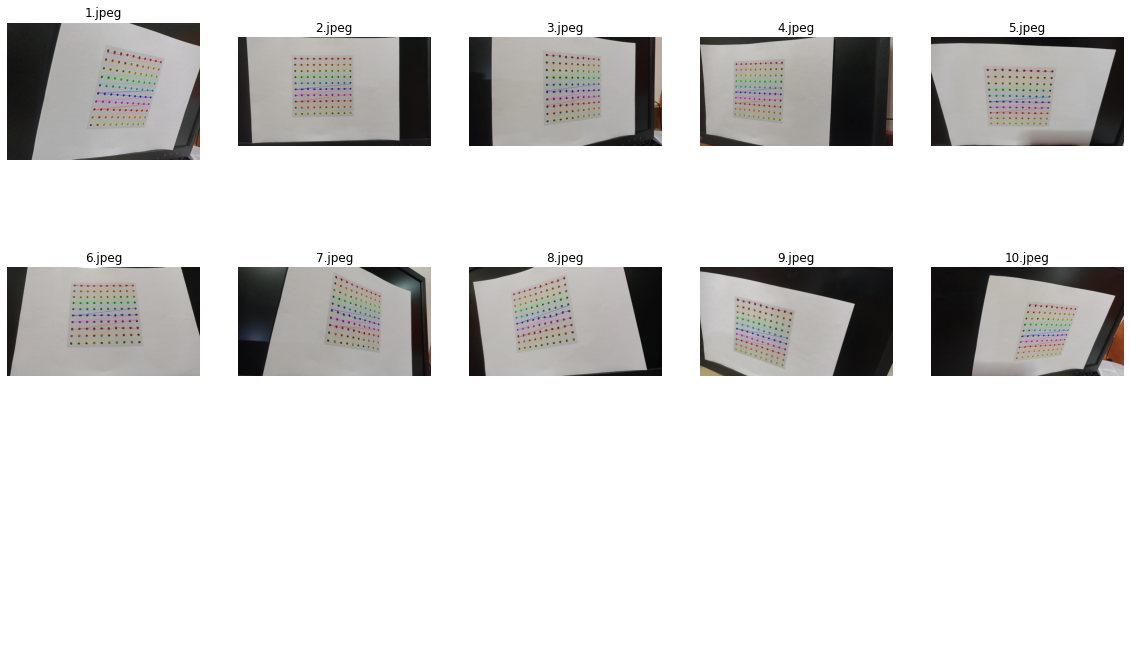

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpeg')
# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Counter for images where corners were detected
found = 0

fig, ax = plt.subplots(3,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame by frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting blobs
    keypoints = blobDetector.detect(img)
    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    
    
    # Find the chess board corners
    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None,
                                      blobDetector = blobDetector)
    
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners,
                                    (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
        ax[i//5,i%5].set_title(fname)

        found+=1

print('Number of images retained during blob detection: ',found)

In [5]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, im_with_keypoints_gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",mtx, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",dist, sep='\n')

Intrinsic Camera Matrix:
[[1418.2254    0.      757.7731]
 [   0.     1430.5819  374.1923]
 [   0.        0.        1.    ]]

Lens Distortion Parameters:
[[ 0.6984 -7.8117 -0.0234 -0.0209 25.2645]]


In [6]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)))

total error: 0.5696714264434382


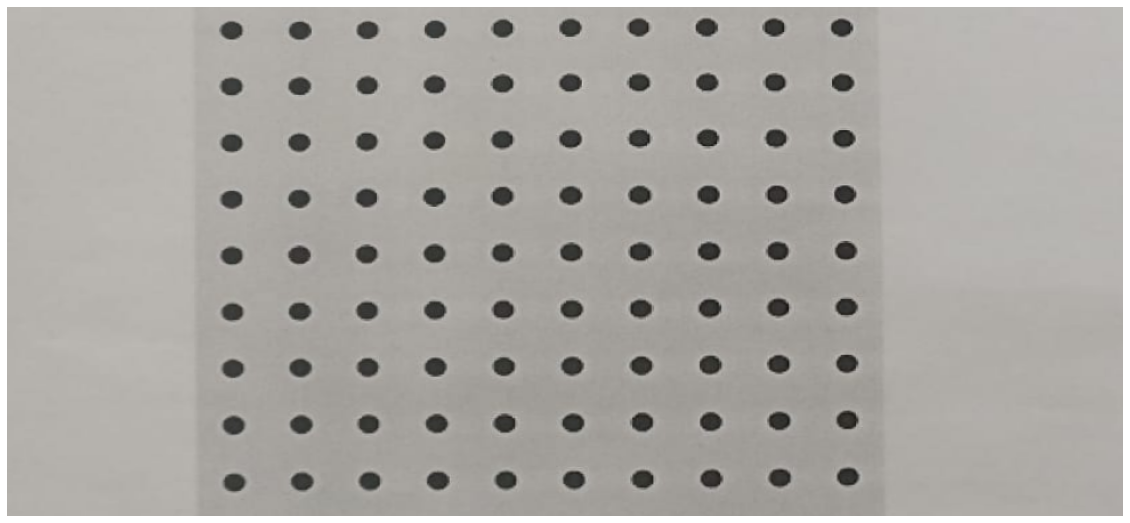

In [12]:
img = cv2.imread(images[1])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
#plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB));